# Cell Annotation
Cell annotation is the process of assigning biological labels to cells based on their gene expression profiles. After clustering in a scRNA-seq workflow, cells are grouped into populations (clusters) that share similar transcriptomic features. Following clustering, differential expression analysis is performed to identify the gene expression profiles of each cluster. This step allows us to determine which cell type each cluster represents based on the genes that are most highly expressed.

#### Annotating Cells
In the cell annotation process, each cluster is examined for differentially expressed genes to identify key marker genes that define specific cell types. By analyzing log fold-change (Log_FC) values, it is possible to assess the differecne in gene expression between clusters. Additionally, marker gene expression is visualized on a UMAP plot, providing a clear representation of how each cluster corresponds to known cell types based on their gene expression signatures.

When doing cell annotation in an unfamiliar tissue, it is always useful to cooperate with colleagues that have already worked with the tissue because they know which cells are expected to be found in an analysis of that tissue.

In [1]:
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read_h5ad('output_files/integrated_marker_data.h5ad')

In [3]:
adata.uns['marker_genes'].rename(columns={'group1': 'cluster', 'lfc_mean':'Log_FC'}, inplace=True)

In [4]:
# Dictionary to which the cells will be annotated.
cell_anno = {}

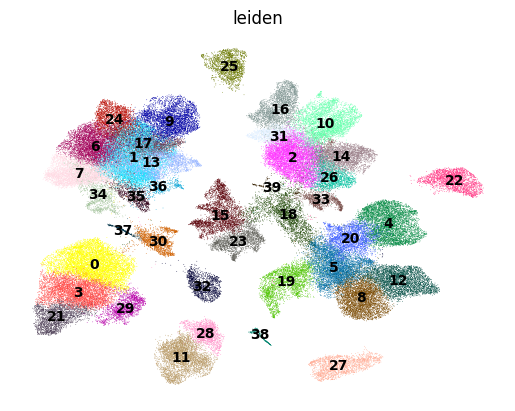

In [5]:
# Visualizing the labled Leiden clusters in an UMAP.
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

Visualizing the labeled UMAP plot allows to easily identify which clusters need to be annotated.

&nbsp;

## Labeling Immune Cells

### CD4 and CD8

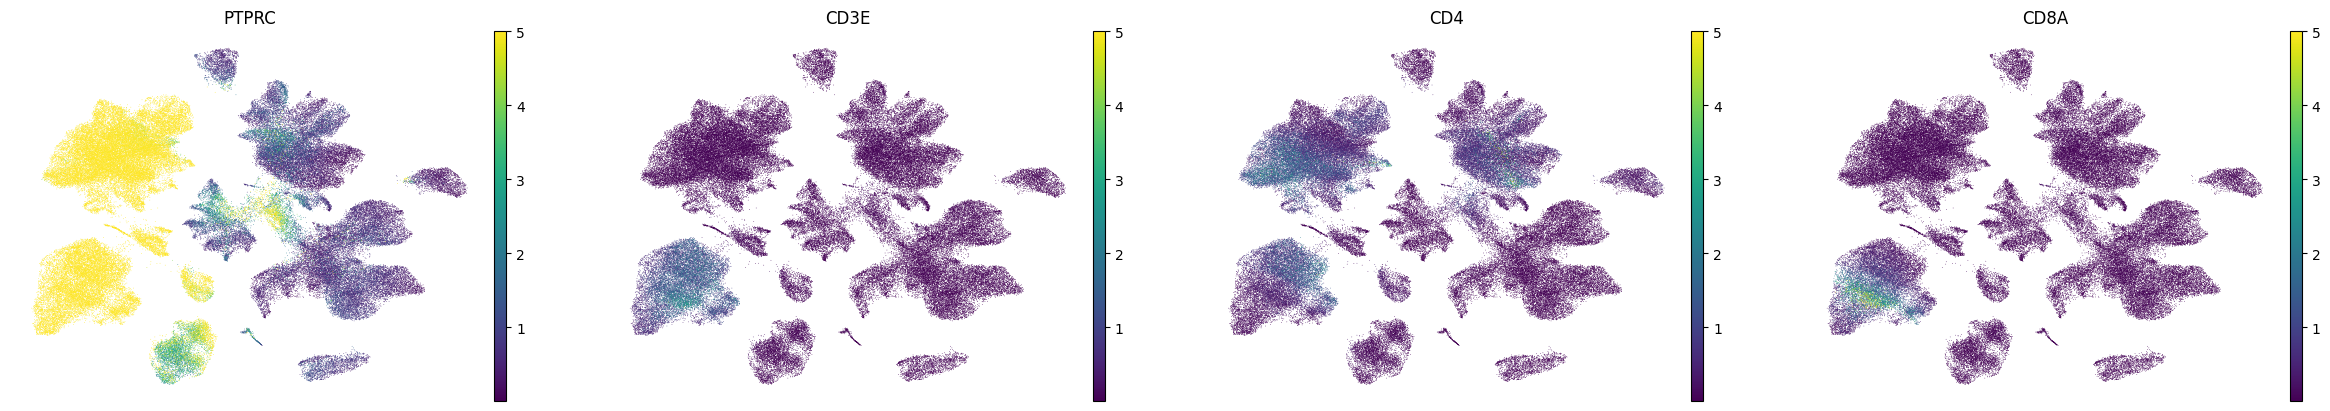

       Log_FC cluster
CD4  3.901624       7
CD4  3.649062      26
CD4  3.566640       0 

         Log_FC cluster
CD8A  7.058798       3
CD8A  5.569008      29
CD8A  5.048187      21


In [6]:
sc.pl.umap(adata, color = ['PTPRC', 'CD3E', 'CD4', 'CD8A'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='CD4'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(3),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='CD8A'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(3)
)

PTPRC (CD45) is a general marker for **immune cells** (leukocytes), CD3E is a marker for **T cells**, CD4 is a marker for **CD4+ helper T** cells, and CD8A is a marker for **CD8+ cytotoxic T cells**.

When CD4 expression is plotted on the UMAP, the clusters with high expression levels likely correspond to CD4+ T cells. Similarly, when CD8A is plotted, the clusters with elevated expression are likely CD8+ T cells. If a cluster shows strong expression of both CD3E and CD4 (cluster 0), it is highly likely to represent CD4+ T cells, whereas a cluster expressing both CD3E and CD8A (cluster 3) is most likely composed of CD8+ T cells.

This is further corroborated by looking at the fold change for each respective marker, which is relatively high for the clusters that seem to express these markers.

Therefore, it is reasonable to conclude that cluster 0 represents CD4+ T cells and cluster 3 represents CD8+ T cells.

In [7]:
# Adding the annotations to the dictionary.
cell_anno.update({'0': 'CD4+ T-Cell', '3': 'CD8+ T-Cell'})

### NK cells, Cycling NK/T cells, B cells, and Plasma cells

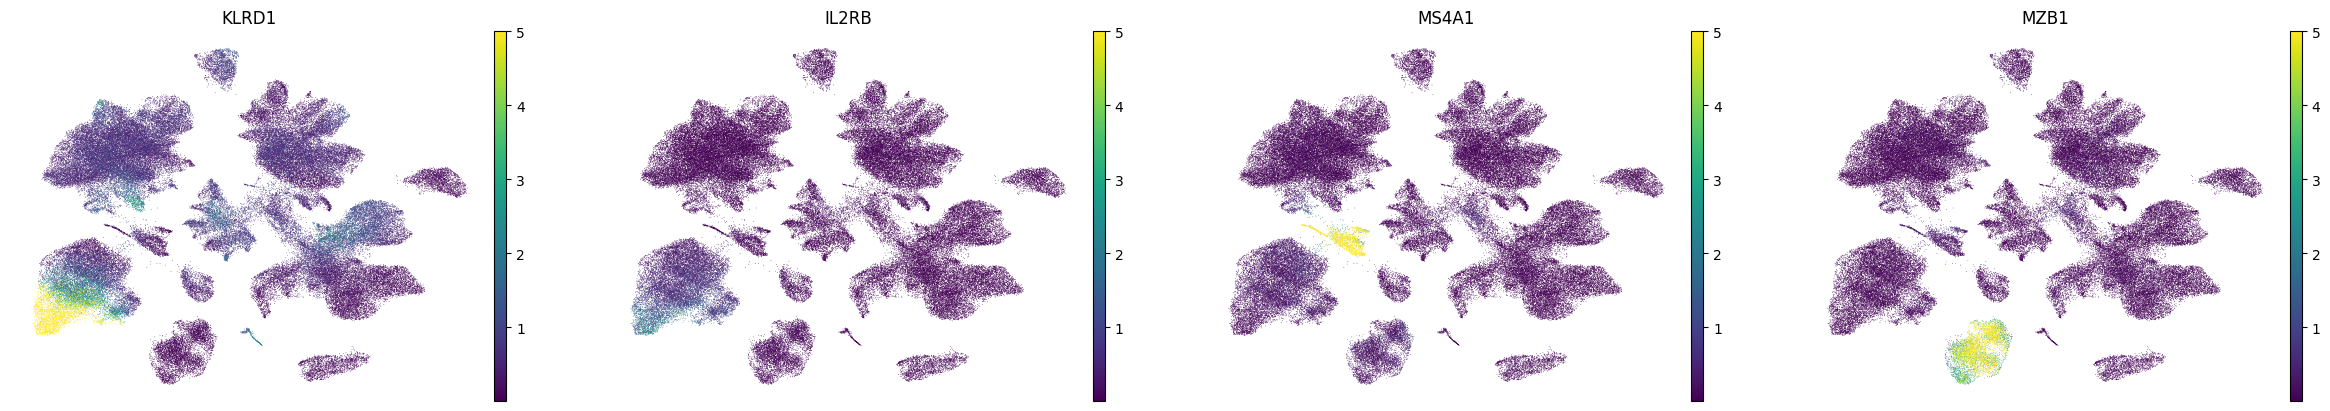

         Log_FC cluster
KLRD1  4.723614      21
KLRD1  2.854997       3
KLRD1  2.250337      38
KLRD1  2.240467      35 

          Log_FC cluster
IL2RB  6.451884      21
IL2RB  5.411612      29
IL2RB  5.382858       3
IL2RB  4.701807       0 

          Log_FC cluster
MS4A1  9.616349      37
MS4A1  9.439878      30
MS4A1  3.847645      34
MS4A1  3.759280      28 

         Log_FC cluster
MZB1  8.465103      28
MZB1  8.386626      11
MZB1  4.196837      37
MZB1  3.378011      30


In [8]:
sc.pl.umap(adata, color = ['KLRD1', 'IL2RB', 'MS4A1', 'MZB1'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='KLRD1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='IL2RB'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='MS4A1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='MZB1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
)

KLRD1 is a marker for **NK cells**, IL2RB is a marker for **NKT cells**, MS4A1 is a marker for **B cells**, and MZB1 is a marker for **plasma cells**.

The high fold change observed for KLRD1 in cluster 21 coupled with the visualization in the UMAP strongly suggests that cluster 21 corresponds to NK cells.
The expression of IL2RB coupled with the lack of KLRD1 in cluster 29 means that this cluster corresponds to cycling NK/T cells.
The strong expression of MZB1 in clusters 11 and 28 correlates with the presence of plasma cells in these clusters.
MS4A1 is very prevalent in clusters 37 and 30, meaning that these clusters correspond to B cells.

In [9]:
# Adding the annotations to the dictionary.
cell_anno.update({'21': 'NK Cell', '29': 'Cycling NK/T Cell', '11': 'Plasma Cell', '28': 'Plasma Cell', '30': 'B Cell', '37': 'B Cell'})

### Macrophages, Dendritic cells, and Monocytes

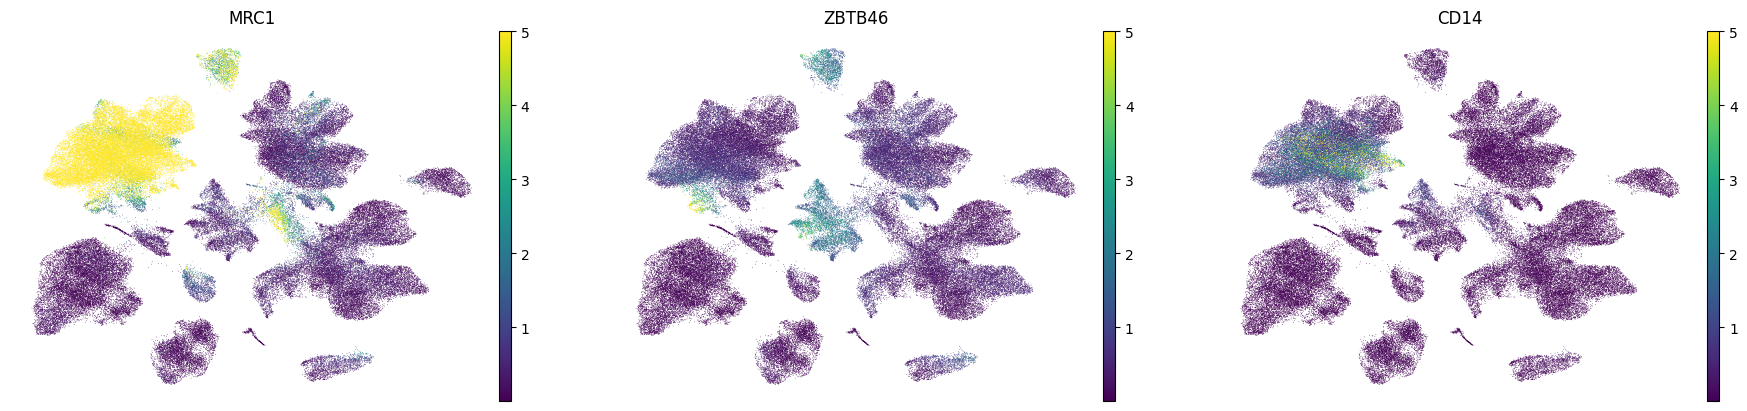

        Log_FC cluster
MRC1  6.024011       7
MRC1  5.625632       9
MRC1  5.002943      13
MRC1  4.877359       1
MRC1  4.646071       6
MRC1  4.326957      24
MRC1  4.134177      36 

           Log_FC cluster
ZBTB46  3.468589      34
ZBTB46  3.278587      15
ZBTB46  3.081110      25 

         Log_FC cluster
CD14  6.764423      13
CD14  5.593246       6
CD14  5.192791      17


In [10]:
sc.pl.umap(adata, color = ['MRC1', 'ZBTB46', 'CD14'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='MRC1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(7),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='ZBTB46'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(3),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='CD14'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(3),
)

MRC1 is a marker for **macrophages**, ZBTB46 is a marker for **dendritic cells**, and CD14 is a marker for **monocytes**.

It seems like most of the clusters near cluster 1 (1, 6, 7, 9, 17, 24, 35, 36) correspond to macrophages, however clusters 34 and 13 seem to correspond to dendritic cells and monocytes, respectively.

In [11]:
# Adding the annotations to the dictionary.
cell_anno.update({'1': 'Macrophage', '6': 'Macrophage', '7': 'Macrophage', '9': 'Macrophage', 
                  '17': 'Macrophage', '24': 'Macrophage', '35': 'Macrophage', '36': 'Macrophage',
                 '34': 'Dendritic Cell',
                 '13': 'Monocyte'})

## Labeling Vascular Cells

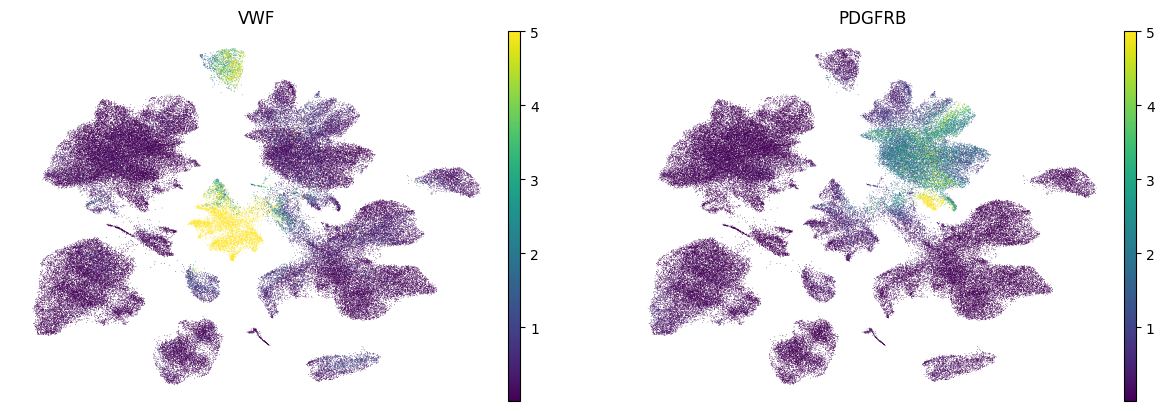

       Log_FC cluster
VWF  8.336945      23
VWF  7.549756      15
VWF  5.484502      25
VWF  4.774786      39 

           Log_FC cluster
PDGFRB  6.312975      33
PDGFRB  5.470626      26
PDGFRB  5.284563      10
PDGFRB  5.222113       2


In [12]:
sc.pl.umap(adata, color = ['VWF', 'PDGFRB'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='VWF'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='PDGFRB'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4)
)

VWF is a marker for **endothelial** cells and PDGFRB is a marker for **pericytes**.

The strong presence of the marker VWF in clusters 15 and 23 indicated that these clusters correspond to endothelial cells. On the other hand, cluster 33 seems to correlate with the presence of pericytes.

In [13]:
# Adding the annotations to the dictionary.
cell_anno.update({'15': 'Endothelial Cell', '23': 'Endothelial Cell', '33': 'Pericyte'})

## Labeling Smooth Muscle Cells

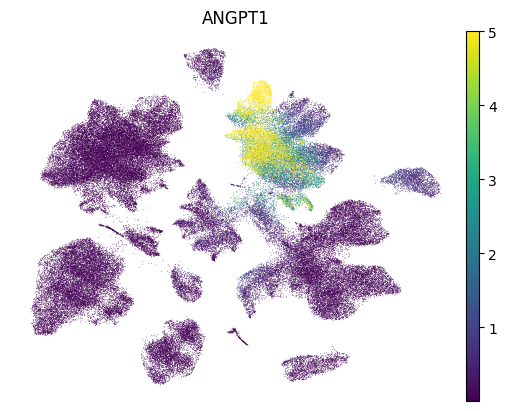

          Log_FC cluster
ANGPT1  7.087599      16
ANGPT1  7.013188      31
ANGPT1  6.876274       2
ANGPT1  6.152105      33


In [14]:
sc.pl.umap(adata, color = ['ANGPT1'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='ANGPT1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    )

ANGPT1 is a marker for **airway smooth muscle** cells.

Clusters 16 and 31 appear to correspond to airway smooth muscle cells.

In [15]:
# Adding the annotations to the dictionary.
cell_anno.update({'16': 'Airway Smooth Muscle Cell', '31': 'Airway Smooth Muscle Cell'})

## Labeling Connective Tissue Cells

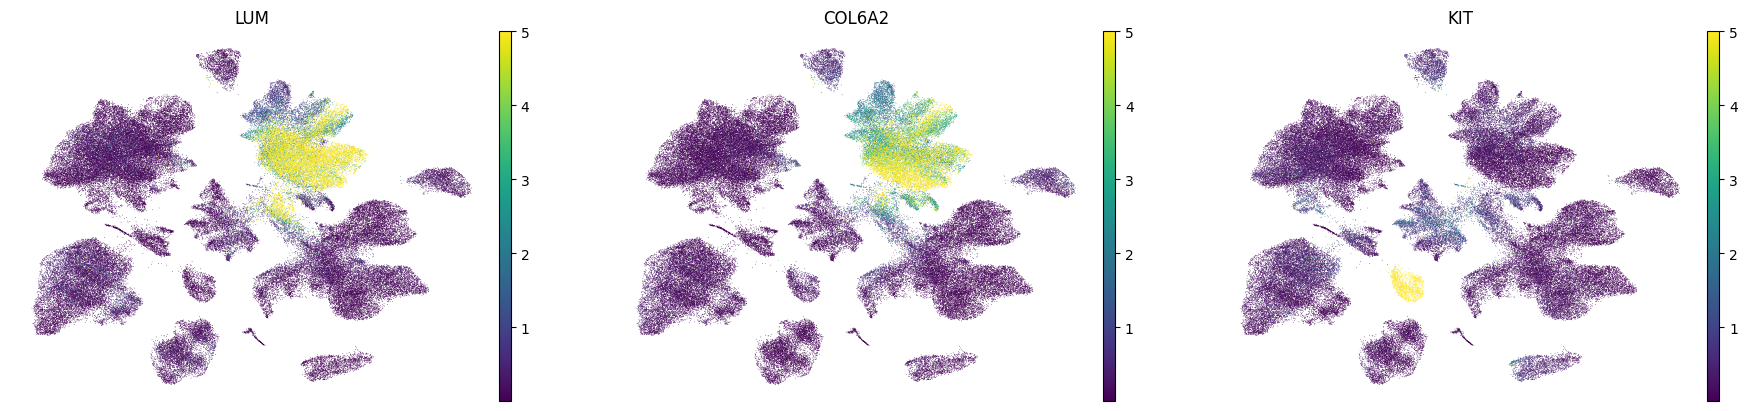

       Log_FC cluster
LUM  7.846951      26
LUM  7.430478      14
LUM  6.672881       2
LUM  6.622665      31 

           Log_FC cluster
COL6A2  6.790066      26
COL6A2  5.963841       2
COL6A2  5.618874      14
COL6A2  5.617522      10 

        Log_FC cluster
KIT  8.774419      32
KIT  3.470163      39
KIT  3.149123      15
KIT  2.691384      34


In [16]:
sc.pl.umap(adata, color = ['LUM', 'COL6A2', 'KIT'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='LUM'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='COL6A2'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='KIT'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4)
)

Both LUM and COL6A2 are markers for **Fibroblasts** and KIT is a marker for **Mast cells**.

The presence of these markers in clusters 2, 10, 14, and 26 indicate that these clusters correspond to FIbroblasts. Mast cells which are immune cells residing in connective tissue have a very strong presence in cluster 32.

In [17]:
# Adding the annotations to the dictionary.
cell_anno.update({'2': 'Fibroblast', '10': 'Fibroblast', '14': 'Fibroblast', '26': 'Fibroblast', '32': 'Mast Cell'})

## Labeling Lung Specific Cells

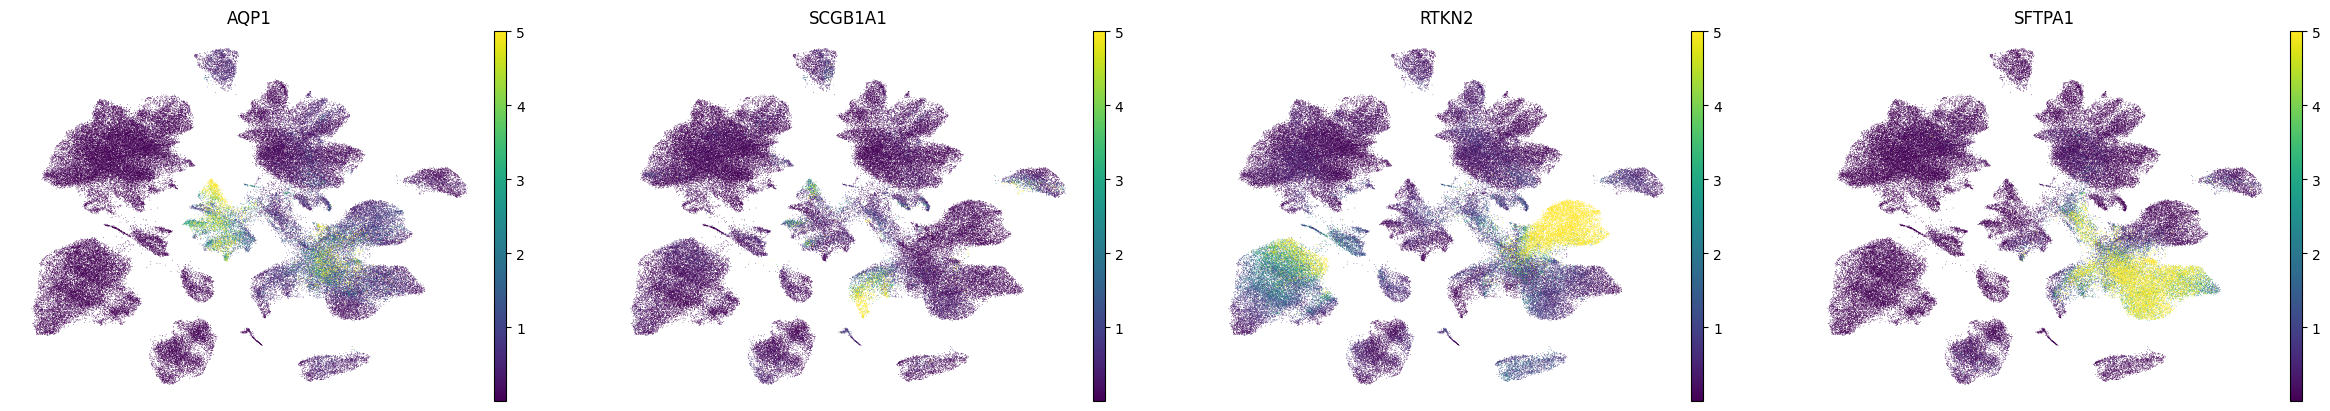

        Log_FC cluster
AQP1  7.130779      15
AQP1  6.486144      23
AQP1  5.988922       5
AQP1  5.722858      39 

            Log_FC cluster
SCGB1A1  5.824539      19
SCGB1A1  3.510291      38
SCGB1A1  2.969956      22
SCGB1A1  2.960145      39 

          Log_FC cluster
RTKN2  6.805258       4
RTKN2  4.866592      20
RTKN2  3.178591       0
RTKN2  2.318149      37 

           Log_FC cluster
SFTPA1  8.994174       8
SFTPA1  8.598334       5
SFTPA1  8.497601      12
SFTPA1  6.364868      19
SFTPA1  6.140287      18


In [18]:
sc.pl.umap(adata, color = ['AQP1', 'SCGB1A1', 'RTKN2', 'SFTPA1'], frameon = False, layer = 'scvi_normalized', vmax=5)

print(
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='AQP1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='SCGB1A1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='RTKN2'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4),
    '\n\n',
    adata.uns['marker_genes'][adata.uns['marker_genes'].index=='SFTPA1'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(5)
)

AQP1 is a marker for **airway epithelia cells**, SCGB1A1 is a marker for **clara cells**, RTKN2 is a marker for **AT1 cells**, and SFTPA1 is a marker for **AT2 cells**.

Cluster 19 strongly expresses Clara cell markers, clusters 5, 8, 12, and 18 seem to correspond to AT2 cells whilst clusters 4 and 20 seem to correspond to AT1 cells.
Cluster 39 is relatively hard to annotate, but it expresses some airway epithelia cell markers.

In [19]:
# Adding the annotations to the dictionary.
cell_anno.update({'19': 'Clara Cell', '5': 'AT2', '8': 'AT2', '12': 'AT2', '18': 'AT2', '4': 'AT1', '20': 'AT1', '39': 'Airway Epithelia Cell'})

## Labeling Other Cells

In [20]:
adata.uns['marker_genes'][adata.uns['marker_genes'].cluster=='22'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(5)

Log_FC cluster
CHST9     10.484442      22
USP2-AS1  10.429791      22
RP1       10.259322      22
ABCA13    10.070457      22
GRM7       9.942169      22

The most expressed markers in cluster 22 are common in **neural cells**. An analysis using DAVID also shows the presence of this marker in neural cells.

In [21]:
adata.uns['marker_genes'][adata.uns['marker_genes'].cluster=='27'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(5)

Log_FC cluster
REG4        10.872219      27
AC114316.1  10.084208      27
IL1RAPL2     9.660560      27
CEACAM5      9.465534      27
MUC5AC       9.268259      27

Cluster 27 mainly expresses marker characteristic of **epithelial cells**. Further analysis using DAVID confirms that the expression of these markers is also correlated with epithelial cell function.

In [22]:
adata.uns['marker_genes'][adata.uns['marker_genes'].cluster=='25'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4)

Log_FC cluster
RELN    10.745245      25
MMRN1    9.799807      25
CCL21    9.344440      25
MGAT4C   9.284906      25

By looking at the top expressed markers in clusters 25, it is possible to see a strong prevalence of endothelial cell markers, which leads to the conclusion that cluster 25 represents a different population of **endothelial cells**.

In [23]:
adata.uns['marker_genes'][adata.uns['marker_genes'].cluster=='38'][['Log_FC', 'cluster']].sort_values(by='Log_FC', ascending=False).head(4)

Log_FC cluster
SLC4A1     12.277549      38
HBD        11.319727      38
ANK1       11.145721      38
LINC02772  10.759929      38

The top markers expressed in cluster 38 are characteristic of **erythroid-like cells**. This might be due to a blood contamination because pulmonary capillaries are densely packed with red blood cells, and even after careful tissue dissociation, residual erythroid progenitors may contaminate the sample.

In [24]:
# Adding the annotations to the dictionary.
cell_anno.update({'25': 'Endothelial Cell ', '38': 'Erythroid-like Cell', '22': 'Neural Cell', '27': 'Epithelial Cell'})

## Annotation and Visualization

In [25]:
len(cell_anno)

40

In [26]:
cell_anno = dict(sorted(cell_anno.items(), key=lambda item: int(item[0])))
cell_anno

{'0': 'CD4+ T-Cell',
 '1': 'Macrophage',
 '2': 'Fibroblast',
 '3': 'CD8+ T-Cell',
 '4': 'AT1',
 '5': 'AT2',
 '6': 'Macrophage',
 '7': 'Macrophage',
 '8': 'AT2',
 '9': 'Macrophage',
 '10': 'Fibroblast',
 '11': 'Plasma Cell',
 '12': 'AT2',
 '13': 'Monocyte',
 '14': 'Fibroblast',
 '15': 'Endothelial Cell',
 '16': 'Airway Smooth Muscle Cell',
 '17': 'Macrophage',
 '18': 'AT2',
 '19': 'Clara Cell',
 '20': 'AT1',
 '21': 'NK Cell',
 '22': 'Neural Cell',
 '23': 'Endothelial Cell',
 '24': 'Macrophage',
 '25': 'Endothelial Cell ',
 '26': 'Fibroblast',
 '27': 'Epithelial Cell',
 '28': 'Plasma Cell',
 '29': 'Cycling NK/T Cell',
 '30': 'B Cell',
 '31': 'Airway Smooth Muscle Cell',
 '32': 'Mast Cell',
 '33': 'Pericyte',
 '34': 'Dendritic Cell',
 '35': 'Macrophage',
 '36': 'Macrophage',
 '37': 'B Cell',
 '38': 'Erythroid-like Cell',
 '39': 'Airway Epithelia Cell'}

In [27]:
# Saving the cell types in another column of adata.obs.
adata.obs['cell_type'] = adata.obs.leiden.map(cell_anno)

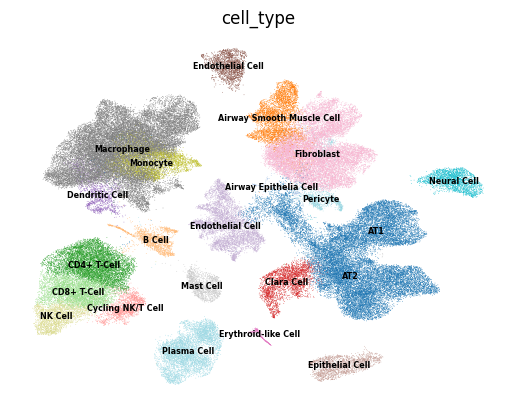

In [28]:
# Visualization of the annotated clusters.
sc.pl.umap(adata, color = ['cell_type'], frameon = False, palette='tab20', legend_loc='on data', legend_fontsize='xx-small')

# References

[Sambomics](https://www.youtube.com/watch?v=uvyG9yLuNSE)

[Study](https://www.nature.com/articles/s41586-021-03569-1)

[Data](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE171524)

[PanglaoDB](https://panglaodb.se/markers.html?cell_type=%27B%20cells%27)

[Scanpy](https://scanpy.readthedocs.io/en/stable/)

[Markers](https://www.cellsignal.com/)

[DAVID](https://davidbioinformatics.nih.gov/home.jsp)